In [82]:
# import libs

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
import nltk
from spellchecker import SpellChecker
from langdetect import detect
from scipy.stats import zscore
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from string import punctuation

vocab = list(nltk.corpus.wordnet.words())
vocab += list(nltk.corpus.words.words())
stopwords = list(nltk.corpus.stopwords.words())


%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.style.use('dark_background')

plotting_config = params = {
                                'legend.fontsize': 'large',
                                'figure.figsize': (20, 10),
                                'axes.labelsize': 'large',
                                'axes.titlesize':'x-large',
                                'xtick.labelsize':'x-large',
                                'ytick.labelsize':'x-large'
                            }

plt.rcParams.update(plotting_config)

In [83]:
reserved_keywords = [
                        'abap',
                        'abend',
                        'abended',
                        'access',
                        'acl',
                        'address',
                        'administrative',
                        'administrator',
                        'alert',
                        'amerirtca',
                        'amerirtcas',
                        'android',
                        'antivirus',
                        'apac',
                        'app',
                        'apple',
                        'application',
                        'archive',
                        'ascii',
                        'asset',
                        'attacker',
                        'authorize',
                        'authorized',
                        'automatic',
                        'automatically',
                        'automation',
                        'available',
                        'azure',
                        'backup',
                        'balance',
                        'bank',
                        'base',
                        'bash',
                        'bill',
                        'bios',
                        'block',
                        'broken',
                        'browser',
                        'build',
                        'business',
                        'button',
                        'cache',
                        'canada',
                        'center',
                        'chrome',
                        'cid',
                        'class',
                        'classification',
                        'click',
                        'client',
                        'code',
                        'company',
                        'confi',
                        'config',
                        'configuration',
                        'connect',
                        'correlation',
                        'cost',
                        'credential',
                        'credentials',
                        'crm',
                        'data',
                        'database',
                        'deadlock',
                        'deadlocked',
                        'defekte',
                        'designer',
                        'desk',
                        'desktop',
                        'deutsch',
                        'device',
                        'dhcp',
                        'dhcpd',
                        'directory',
                        'disclaimer',
                        'disk',
                        'dm',
                        'dmz',
                        'dns',
                        'document',
                        'download',
                        'driver',
                        'dst',
                        'dstport',
                        'dsw',
                        'edt',
                        'email',
                        'encode',
                        'end',
                        'engineering',
                        'english',
                        'environment',
                        'erp',
                        'error',
                        'europe',
                        'european',
                        'except',
                        'exception',
                        'external',
                        'extract',
                        'extraction',
                        'fail',
                        'false',
                        'fatal',
                        'feed',
                        'file',
                        'finance',
                        'firebox',
                        'firefox',
                        'forecast',
                        'france',
                        'friday',
                        'ftp',
                        'gecko',
                        'generator',
                        'german',
                        'germany',
                        'grid',
                        'hacker',
                        'hex',
                        'hexagonal',
                        'homepage',
                        'host',
                        'html',
                        'http',
                        'hub',
                        'id',
                        'image',
                        'incident',
                        'incoming',
                        'india',
                        'infection',
                        'injection',
                        'install',
                        'internal',
                        'internet',
                        'italia',
                        'isensor',
                        'iphone',
                        'job',
                        'jpg',
                        'label',
                        'language',
                        'latin',
                        'leakage',
                        'linux',
                        'lock',
                        'log',
                        'login',
                        'logon',
                        'mac',
                        'machine',
                        'magento',
                        'mail',
                        'memory',
                        'message',
                        'metric',
                        'maintenance',
                        'malicious',
                        'malware',
                        'manager',
                        'micro',
                        'micorsoft',
                        'misconfigure',
                        'misconfigured',
                        'multi',
                        'model',
                        'modify',
                        'monday',
                        'monitor',
                        'mozilla',
                        'msid',
                        'negative',
                        'net',
                        'netscape',
                        'ngm',
                        'nfs',
                        'node',
                        'none',
                        'null',
                        'number',
                        'off',
                        'office',
                        'official',
                        'online',
                        'outlook',
                        'packet',
                        'password',
                        'passwords',
                        'path',
                        'pay',
                        'payable',
                        'payment',
                        'pen',
                        'php',
                        'ping',
                        'plant',
                        'platform',
                        'png',
                        'port',
                        'portable',
                        'portal',
                        'positive',
                        'post',
                        'procedure',
                        'process',
                        'prod',
                        'production',
                        'protected',
                        'protocol',
                        'proxy',
                        'python',
                        'qa',
                        'read',
                        'rebuild',
                        'region',
                        'regional',
                        'relay',
                        'report',
                        'requirement',
                        'rerun',
                        'response',
                        'responsive',
                        'result',
                        'results',
                        'rpc',
                        'rps',
                        'run',
                        'russia',
                        'saturday',
                        'scan',
                        'schedule',
                        'scheduler',
                        'scm',
                        'screen',
                        'security',
                        'sequence',
                        'server',
                        'service',
                        'services',
                        'session',
                        'setting',
                        'severity',
                        'shipment',
                        'sid',
                        'sign',
                        'signature',
                        'signin',
                        'signout',
                        'skype',
                        'soft',
                        'software',
                        'sort',
                        'sorting',
                        'source',
                        'space',
                        'sql',
                        'src',
                        'srcport',
                        'ssh',
                        'stack',
                        'start',
                        'static',
                        'status',
                        'storage',
                        'subject',
                        'subscription',
                        'summary',
                        'sunday',
                        'suspicious',
                        'switch',
                        'switzerland',
                        'system',
                        'table',
                        'taskmgr',
                        'technical',
                        'telephony',
                        'telecom',
                        'text',
                        'terralink',
                        'thread',
                        'thumb',
                        'thursday',
                        'ticket',
                        'tuesday',
                        'transaction',
                        'translate',
                        'translation',
                        'transmit',
                        'transission',
                        'trigger',
                        'trojan',
                        'true',
                        'uat',
                        'udp',
                        'unauthorize',
                        'unauthorized',
                        'unavailable',
                        'unix',
                        'update',
                        'upgrade',
                        'upload',
                        'uri',
                        'url',
                        'urlhost',
                        'usa',
                        'usb',
                        'utc',
                        'virus',
                        'volume',
                        'warehouse',
                        'web',
                        'website',
                        'wednesday',
                        'window',
                        'windows',
                        'withdraw',
                        'word',
                        'workstation',
                        'write',
                        'xml'
                    ]


foreign_laguage_keywords = [
                                'abgebrochen',
                                'angefragt',
                                'deutsch',
                                'defekt',
                                'fehler',
                                'gesperrt',
                                'kollegen',
                                'markhtyeting',
                                'ordner',
                                'vertraulich',
                                'nwfodmhc',
                                'zugriff'
                            ]


exclude_list = [
                 'aa',
                 'aar',
                 'aber',
                 'able',
                 'abc',
                 'ac',
                 'acc',
                 'acknowledgement',
                 'add',
                 'almost',
                 'also',
                 'although',
                 'amar',
                 'anymore',
                 'anymore',
                 'approximately',
                 'ar',
                 'art',
                 'ask',
                 'assist',
                 'at',
                 'ate',
                 'attendance',
                 'available',
                 'avoid',
                 'back',
                 'behalf',
                 'best',
                 'call',
                 'can',
                 'can',
                 'cannot',
                 'case',
                 'characteristic',
                 'comp',
                 'could',
                 'confirm',
                 'dear',
                 'der',
                 'due',
                 'ea',
                 'ec',
                 'easy',
                 'ee',
                 'eer',
                 'enimal',
                 'enter',
                 'environ',
                 'er',
                 'err',
                 'etc',
                 'every',
                 'everything',
                 'find',
                 'fix',
                 'get',
                 'give',
                 'go',
                 'help',
                 'help',
                 'immediately',
                 'impossible',
                 'in',
                 'ing',
                 'investigate',
                 'keep',
                 'kind',
                 'kindly',
                 'know',
                 'kris',
                 'leave',
                 'let',
                 'logo',
                 'look',
                 'mail',
                 'make',
                 'name',
                 'neck',
                 'need',
                 'new',
                 'next',
                 'nne',
                 'not',
                 'nothing',
                 'one',
                 'original',
                 'please',
                 'please',
                 'problem',
                 'pst',
                 'relate',
                 'receive',
                 'recieve',
                 'receivng',
                 'ref',
                 'reportncqulao',
                 'say',
                 'says',
                 'said',
                 'see',
                 'send',
                 'send',
                 'set',
                 'shortly',
                 'since',
                 'somebody',
                 'someone',
                 'soon',
                 'sorry',
                 'st',
                 'still',
                 'tea',
                 'tee',
                 'team',
                 'to',
                 'together',
                 'try',
                 'tst',
                 'tup',
                 'und',
                 'urgent',
                 'use',
                 'val',
                 'verify',
                 'wait',
                 'week',
                 'welcome',
                 'within',
                 'wish',
                 'wishing',
                 'work',
                 'would',
                 'yes'
            ]

stopwords += exclude_list
reserved_keywords += foreign_laguage_keywords
vocab += reserved_keywords
vocab = list(set(vocab).difference(stopwords))


In [84]:
data = pd.read_pickle('feature_set.pkl')
data.head()

,cleaned_merged_text,group_id,num_tokens,num_unique_tokens,num_characters
0,login issue confirm verify password issue chec...,0,17,14,116
1,outlook meet somebody skype outlook calendar r...,0,10,9,74
2,cant log vpn log cannot receive vpn,0,7,5,35
3,unable access tool page unable access tool page,0,8,4,47
4,error skype error skype,0,4,2,23


In [85]:
def remove_extra_spaces(text):
    text = re.sub(r'\s{2,}', '', text)
    return text


def remove_stop_words(text):
    for word in text.split():
        if word in stopwords:
            text = re.sub(r'\b{}\b'.format(word), '', text)
    return text

def remove_special_chars(text):
    try:
        text = ' '.join(re.findall(r'\w+', text)).lower()
        for char in punctuation:
            if char in text:
                text = re.sub(char, ' ', text)
        text = text.replace('\n', '').replace('\r', '').replace('\t', '')
        text = remove_extra_spaces(text)
    except Exception as e:
        e = f'Special character remover crashed at text: {text} | Err Msg={e}'
        print(e)
    return text
    


def get_most_frequent_item(array):
    try:
        if type(array) is not list:
            array = list(array)
        return max(array, key=array.count) 
    except Exception as e:
        print(f'Failed to extract most frequent item from: {array} | Err msg={e}')
    
    
def get_wordnet_pos_tag(word):
    pos = None
    try:
        synsets = list(map(lambda x: x.name().split('.'), wordnet.synsets(word)))
        if bool(synsets):
            tags = list(map(lambda x: x[1], synsets))
            pos = get_most_frequent_item(tags)
    except Exception as e:
        e = f'Wordnet POS tagger crashed at word: {word} | Err Msg={e}'
        print(e)
    return pos


def get_default_pos_tag(word):
    supperted_tags = [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]
    expected_tags =[ 'n', 'v', 'j', 'r']
    pos_tag_map = dict(zip(expected_tags, supperted_tags))
    pos = None
    try:
        # nltk.pos_tag return something like 'NN', 'VB'
        # convert them to tags supported by wordnet like: 'n', 'v'
        nltk_pos_tag = nltk.pos_tag([word])[0][1].lower()[0]
        pos = pos_tag_map.get(nltk_pos_tag)
    except Exception as e:
        e = f'Default POS tagger crashed at word: {word} | Err Msg={e}'
        print(e)
    return pos
    

def get_pos_tag(word):
    # default return value will be: 'n' for NOUN
    pos = None
    try:
        pos = get_wordnet_pos_tag(word)
        if pos is None or pos not in 'nvjr':
            pos = get_default_pos_tag(word)
    except ValueError as e:
        pos = get_default_pos_tag(word)
    except Exception as e:
        e = f'POS tagger crashed at word: {word} | Err Msg={e}'
    return pos or 'n'


def get_all_possible_words(complex_word, n=3):
    words_detected = []
    try:
        complex_word = remove_special_chars(complex_word).replace(' ', '')
        for i in range(len(complex_word)):
            current_char = complex_word[i]  # pick the first char
            for j in range(i+1, len(complex_word)):
                other_chars = complex_word[i+1:j+1]  # pick all other chars
                possible_word = current_char + other_chars  # form all possible combinations
                if possible_word in vocab:
                    if len(possible_word) >= n:
                        words_detected.append(possible_word)
        words_detected = set(words_detected)
    except Exception as e:
        print(f'All possible words generator crashed, Err Msg={e}')
    return words_detected


def get_char_map(complex_word, word_list=None, sort=True, reverse=True, n=3):
    char_map = {}
    try:
        if not bool(word_list):
            word_list = get_all_possible_words(complex_word, n=n)
        complex_word = remove_special_chars(complex_word).replace(' ', '')
        for char in set(complex_word):
            if char not in char_map:
                words_by_char = set(list(filter(lambda x: x.startswith(char), word_list)))
                if sort:
                    words_by_char = sorted(words_by_char, key=len, reverse=reverse)
                char_map[char] = words_by_char
    except Exception as e:
        print(f'Char map generator crashed, Err Msg={e}')
    return char_map


def extract_possible_words(complex_word, char_map=None, word_list=None, n=2):
    extracted_words = []
    try:
        if word_list is None:
            word_list = get_all_possible_words(complex_word, n=n)
        if not bool(char_map):
            char_map  = get_char_map(complex_word, word_list=word_list, n=n)
        
        target_word = remove_special_chars(complex_word).replace(' ', '')
        for i in range(len(complex_word)):
            first_char = target_word[0]
            possible_words = char_map.get(first_char)
            if bool(possible_words):
                for word in possible_words:
                    if target_word.startswith(word):
                        if word not in extracted_words:
                            extracted_words.append(word)
                            target_word = target_word[len(word):]
                            break
#                       else:
#                           target_word = target_word[len(word):]
            else:
                target_word = target_word[1:]
            if len(target_word) <= 1:
                break
    except Exception as e:
        print(f'Words extractor crashed, Err Msg={e}')
    return extracted_words

In [86]:
data['cleaned_merged_text'] = data.cleaned_merged_text.apply(remove_stop_words)

# Extracting top keywords from text

In [87]:
#looking at the data
data.head(5)

,cleaned_merged_text,group_id,num_tokens,num_unique_tokens,num_characters
0,login issue password issue check employee ma...,0,17,14,116
1,outlook meet skype outlook calendar appear a...,0,10,9,74
2,cant log vpn log vpn,0,7,5,35
3,unable access tool page unable access tool page,0,8,4,47
4,error skype error skype,0,4,2,23


# TFIDF to count top words

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
import re
docs=data.cleaned_merged_text.tolist()
cv=CountVectorizer(max_df=0.85,stop_words="english",max_features=10000)
word_count_vector=cv.fit_transform(docs)
word_count_vector.shape

(8497, 8665)

## Top 10 kw from our data

In [89]:
list(cv.vocabulary_.keys())[:10]

['login',
 'issue',
 'password',
 'check',
 'employee',
 'manager',
 'resolve',
 'user',
 'reset',
 'caller']

##  TfidfTransformer to Compute Inverse Document Frequency (IDF)

In [90]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

The sort_coo(...) method essentially sorts the values in the vector while preserving the column index. Once you have the column index then its really easy to look-up the corresponding word value as you would see in extract_topn_from_vector(...) where we do feature_vals.append(feature_names[idx]).

In [91]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

## Pass your input text 

In [92]:
input_text=data.cleaned_merged_text[0]
docs_test=[input_text]
print (data.cleaned_merged_text[0])
#print (type(docs_test))

login issue   password issue check employee manager detail resolve login user reset check caller advise


# Calling the Function

In [93]:
# you only needs to do this once
feature_names=cv.get_feature_names()

# get the document that we want to extract keywords from
doc=docs_test[0]

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)

# now print the results
print("\n=====Title=====")
print(docs_test[0])
print("\n=====Body=====")
#print(docs_body[0])
print("\n===Keywords===")
for k in keywords:
    print(k,keywords[k])


=====Title=====
login issue   password issue check employee manager detail resolve login user reset check caller advise

=====Body=====

===Keywords===
check 0.456
login 0.441
issue 0.353
caller 0.313
advise 0.283
employee 0.272
resolve 0.254
manager 0.246
user 0.183
reset 0.183


# Topic Modelling

Source of code 

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

In [94]:

#importing libraries 
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
stemmer = SnowballStemmer("english")



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mvanjiappan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [95]:
data_text = data[['cleaned_merged_text']] 
print (type(data_text))
print (data_text)
data_text['index'] = data_text.index
data_text.head(1)
documents=data_text
documents.head(1)


<class 'pandas.core.frame.DataFrame'>
                                    cleaned_merged_text
0     login issue   password issue check employee ma...
1     outlook meet  skype outlook calendar  appear a...
2                                cant log vpn log   vpn
3       unable access tool page unable access tool page
4                               error skype error skype
5     log engineering unable skype tool log engineer...
6     event  value mount point sid threshold host co...
7     user employment status ticket employee  user e...
8        outlook unable disable  outlook unable disable
9               ticket plant update ticket plant update
10    connect report engineering unable  submit tool...
11    load correctly tool page site loading correctl...
12    login unable sgxqsuojr tool xwbesorf card logi...
13            user reset password  user reset password 
14              payslip unable open payslip unable open
15              ticket plant update ticket plant update
16    logi

,cleaned_merged_text,index
0,login issue password issue check employee ma...,0


In [96]:
# to lemmatize and preprocess
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


# Viewing a sample data 

In [97]:
documents['cleaned_merged_text'][0]

'login issue   password issue check employee manager detail resolve login user reset check caller advise'

In [98]:


doc_sample = documents[documents['index'] == 0].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

processed_docs = documents['cleaned_merged_text'].map(preprocess)
processed_docs


original document: 
['login', 'issue', '', '', 'password', 'issue', 'check', 'employee', 'manager', 'detail', 'resolve', 'login', 'user', 'reset', 'check', 'caller', 'advise']


 tokenized and lemmatized document: 
['login', 'issu', 'password', 'issu', 'check', 'employe', 'manag', 'resolv', 'login', 'user', 'reset', 'check', 'caller', 'advis']


0       [login, issu, password, issu, check, employe, ...
1       [outlook, meet, skype, outlook, calendar, appe...
2                                                      []
3       [unabl, access, tool, page, unabl, access, too...
4                            [error, skype, error, skype]
5       [engin, unabl, skype, tool, engin, unabl, skyp...
6       [event, valu, mount, point, threshold, host, c...
7       [user, employ, status, ticket, employe, user, ...
8        [outlook, unabl, disabl, outlook, unabl, disabl]
9            [ticket, plant, updat, ticket, plant, updat]
10      [connect, report, engin, unabl, submit, tool, ...
11      [load, correct, tool, page, site, load, correc...
12      [login, unabl, sgxqsuojr, tool, xwbesorf, card...
13         [user, reset, password, user, reset, password]
14           [payslip, unabl, open, payslip, unabl, open]
15           [ticket, plant, updat, ticket, plant, updat]
16      [login, unabl, compani, unabl, compani, urgent...
17            

# Bag of words on the dataset

In [99]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break


0 advis
1 caller
2 check
3 employe
4 issu
5 login
6 manag
7 password
8 reset
9 resolv
10 user
11 appear
12 calendar
13 correct
14 meet
15 outlook
16 skype
17 access
18 page
19 tool
20 unabl



# Filter out tokens that appear in

##### less than 15 documents (absolute number) or
###### more than 0.5 documents (fraction of total corpus size, not absolute number).
###### after the above two steps, keep only the first 100000 most frequent tokens.

In [100]:


dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)



# Gensim doc2bow


For each document we create a dictionary reporting how many
words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.

In [101]:



bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[0]


[(0, 1),
 (1, 1),
 (2, 2),
 (3, 1),
 (4, 2),
 (5, 2),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1)]

# preview

In [102]:
documents['cleaned_merged_text'][0]

'login issue   password issue check employee manager detail resolve login user reset check caller advise'

In [103]:

print (len(bow_corpus))
bow_doc_410 = bow_corpus[0]
for i in range(len(bow_doc_410)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_410[i][0], 
                                               dictionary[bow_doc_410[i][0]], 
bow_doc_410[i][1]))



8497
Word 0 ("advis") appears 1 time.
Word 1 ("caller") appears 1 time.
Word 2 ("check") appears 2 time.
Word 3 ("employe") appears 1 time.
Word 4 ("issu") appears 2 time.
Word 5 ("login") appears 2 time.
Word 6 ("manag") appears 1 time.
Word 7 ("password") appears 1 time.
Word 8 ("reset") appears 1 time.
Word 9 ("resolv") appears 1 time.
Word 10 ("user") appears 1 time.


# Create a TFIDF object using models

In [104]:

from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break


[(0, 0.3030812379674724),
 (1, 0.34372677137098856),
 (2, 0.4599814394444773),
 (3, 0.289080054551049),
 (4, 0.32223646179767756),
 (5, 0.4385188364594362),
 (6, 0.21648036278032454),
 (7, 0.15504148718088295),
 (8, 0.16959259580421887),
 (9, 0.2649457589806148),
 (10, 0.16984948057182306)]


# Running LDA using Bag of Words

In [105]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
#lda_model = gensim.models.LdaMulticore(bow_corpus[0], num_topics=1, id2word=dictionary, passes=2, workers=2)


In [106]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))



Topic: 0 
Words: 0.025*"access" + 0.022*"server" + 0.021*"platform" + 0.020*"collabor" + 0.019*"host" + 0.018*"instal" + 0.016*"time" + 0.015*"applic" + 0.014*"tool" + 0.013*"login"
Topic: 1 
Words: 0.047*"password" + 0.038*"compani" + 0.035*"access" + 0.034*"user" + 0.034*"account" + 0.033*"unlock" + 0.032*"email" + 0.029*"reset" + 0.019*"phone" + 0.015*"chang"
Topic: 2 
Words: 0.033*"outag" + 0.033*"start" + 0.031*"compani" + 0.028*"host" + 0.028*"network" + 0.025*"site" + 0.022*"circuit" + 0.022*"backup" + 0.021*"schedul" + 0.018*"email"
Topic: 3 
Words: 0.031*"unabl" + 0.021*"password" + 0.020*"print" + 0.019*"printer" + 0.019*"restor" + 0.015*"reset" + 0.014*"updat" + 0.014*"chang" + 0.014*"compani" + 0.013*"august"
Topic: 4 
Words: 0.028*"plant" + 0.027*"error" + 0.025*"unabl" + 0.020*"login" + 0.020*"updat" + 0.018*"creat" + 0.018*"laptop" + 0.017*"order" + 0.015*"issu" + 0.015*"skype"
Topic: 5 
Words: 0.036*"access" + 0.028*"setup" + 0.022*"account" + 0.018*"termin" + 0.016*"co

# Running LDA using TF-IDF

In [107]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))


Topic: 0 Word: 0.090*"schedul" + 0.083*"fail" + 0.035*"abend" + 0.032*"unlock" + 0.029*"unabl" + 0.026*"account" + 0.019*"login" + 0.019*"laptop" + 0.017*"defekt" + 0.011*"host"
Topic: 1 Word: 0.031*"connect" + 0.023*"unabl" + 0.019*"password" + 0.015*"manag" + 0.014*"reset" + 0.013*"tool" + 0.012*"user" + 0.012*"host" + 0.011*"summari" + 0.011*"skype"
Topic: 2 Word: 0.089*"password" + 0.082*"reset" + 0.028*"outlook" + 0.024*"tool" + 0.021*"manag" + 0.013*"unabl" + 0.012*"window" + 0.012*"user" + 0.011*"skype" + 0.009*"sign"
Topic: 3 Word: 0.035*"problem" + 0.022*"outlook" + 0.016*"bitt" + 0.016*"open" + 0.015*"fail" + 0.015*"schedul" + 0.014*"unabl" + 0.012*"report" + 0.012*"printer" + 0.012*"updat"
Topic: 4 Word: 0.070*"fail" + 0.065*"schedul" + 0.037*"password" + 0.023*"access" + 0.023*"reset" + 0.021*"unlock" + 0.021*"updat" + 0.020*"account" + 0.018*"plant" + 0.018*"ticket"
Topic: 5 Word: 0.058*"lock" + 0.046*"account" + 0.027*"tool" + 0.022*"setup" + 0.020*"engin" + 0.019*"fail" 

# Performance evaluation by classifying sample document using LDA Bag of Words model

We will check where our test document would be classified

In [108]:
print (processed_docs[0])
print (bow_corpus[0])

for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 5)))

['login', 'issu', 'password', 'issu', 'check', 'employe', 'manag', 'resolv', 'login', 'user', 'reset', 'check', 'caller', 'advis']
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]

Score: 0.4111157953739166	 
Topic: 0.070*"lock" + 0.063*"unabl" + 0.063*"account" + 0.038*"connect" + 0.030*"email"

Score: 0.36642390489578247	 
Topic: 0.057*"issu" + 0.034*"user" + 0.030*"error" + 0.024*"manag" + 0.024*"ticket"

Score: 0.1757870465517044	 
Topic: 0.114*"password" + 0.093*"tool" + 0.081*"reset" + 0.034*"manag" + 0.034*"unabl"


# Performance evaluation by classifying sample document using LDA TF-IDF model.

In [109]:
print (processed_docs[0])
print (bow_corpus[0])

for index, score in sorted(lda_model_tfidf[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

['login', 'issu', 'password', 'issu', 'check', 'employe', 'manag', 'resolv', 'login', 'user', 'reset', 'check', 'caller', 'advis']
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]

Score: 0.9399853944778442	 
Topic: 0.030*"issu" + 0.027*"login" + 0.020*"user" + 0.018*"collabor" + 0.018*"platform" + 0.018*"password" + 0.016*"access" + 0.013*"unabl" + 0.011*"drucker" + 0.011*"printer"


# Topic handeling other code

In [110]:
tfidf = TfidfVectorizer(stop_words='english')
corpus = [
    'I would like to check this document',
    'How about one more document',
    'Aim is to capture the key words from the corpus',
    'frequency of words in a document is called term frequency'
]

X = tfidf.fit_transform(corpus)
feature_names = np.array(tfidf.get_feature_names())


new_doc = ['can key words in this new document be identified?',
           'idf is the inverse document frequency caculcated for each of the words']
responses = tfidf.transform(new_doc)


def get_top_tf_idf_words(response, top_n=5):
    sorted_nzs = np.argsort(response.data)[:-(top_n+1):-1]
    return feature_names[response.indices[sorted_nzs]]

print([get_top_tf_idf_words(response,5) for response in responses])

#[array(['key', 'words'], dtype='<U9'),
#array(['frequency', 'words'], dtype='<U9')]

[array(['key', 'words', 'document'], dtype='<U9'), array(['frequency', 'words', 'document'], dtype='<U9')]


In [111]:
# creating a TFIDF vectorizer for cleaned merged text
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors = vectorizer.fit_transform(data.cleaned_merged_text)
tfidf = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())

In [112]:
tfidf.head()

,aao,aao analysis,aao tool,abandon,abandon maybe,abap,abap data,abap desktop,abap erp,abap field,abap report,abap ticket,abap transaction,abap zkwfqagb,abarbeiten,abarbeiten versucht,abarbeiten zeit,abca,abca enceinjury,abd,abd opening,abend,abend host,abend interface,abend job,abended,abended apo,abended chg,abended delay,abended erp,abended host,abended idocs,abended job,abended longer,abended regen,abended report,abended server,abended slt,abended start,abended step,abended tool,abertura,abertura antivirus,abfragetimeout,abfragetimeout fehler,abgebildet,abgebildet item,abgebrochen,abgebrochen nkung,abgelaufen,...,zuteillisten,zuteillisten glich,zuteillisten point,zuvor,zuvor datenbanken,zwei,zweites,zweites tut,zwip,zwip check,zwip plant,zwwirep,zwwirep user,zzcmpgn,zzcmpgn relevant,ºçž,ºçž vpn,ãÿigen,ãÿigen nden,æœºä,æœºä window,æœºä æœºä,æœºå,æœºå upsæ,æœºé,æœºé prtsid,éšœ,éšœ walkmeä,éšœ æœºå,ÿæƒ,ÿæƒ post,ÿæƒ view,žanmelde,žanmelde kommt,žapptc,žapptc verbinde,žauftrag,žauftrag geht,žbaut,žbaut freundlichen,žbriefkopf,žbriefkopf drucker,žskype,žvon,žvon freundlichen,žvw,žvw adressaten,ˆæœ,ˆæœ java,ˆæœ sippprçš
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
# trim outliers
import re

def trim_text(text, max_tokens):
    tokens_to_preserve = []
    f = nltk.FreqDist(text.split())
    for i in range(len(f.most_common())):
        if i > max_tokens:
            break
        token, count = f.most_common()[i]
        if token not in vocab:
            tokens_to_preserve.append(token)
    for token in text.split():
        if token not in tokens_to_preserve:
            text = re.sub(r'\b{}\b'.format(token), '', text)
    text = re.sub(r'\s{2,}', '', text)
    return text


# fliter exclude list
def remove_exclude_list_items(text):
    for word in text.split():
        if word in exclude_list:
            text = re.sub(r'\b{}\b'.format(word), '', text)
    text = re.sub(r'\s{2,}', ' ', text)
    return text


# filter out words having special chars
def remove_words_with_special_cahrs(text):
    for word in text.split():
        if not(bool(re.match(r'[a-z]+', word))):
            text = re.sub(r'\b{}\b'.format(word), ' ', text)
    text = re.sub(r'\s{2,}', ' ', text)
    return text

# extract most frequent tokens
def get_top_n_tokens(text, n=10):
    f_dist = nltk.FreqDist(text.split())
    df = pd.DataFrame(f_dist.most_common(), columns=['token', 'occurences'])
    token_mean = df.occurences.mean()
    top_tokens = []
    
    for i in range(df.shape[0]):
        token, count = df['token'][i], df['occurences'][i]
        if len(top_tokens) > n:
            break
        if (count >= token_mean) or (token in reserved_keywords):
            top_tokens.append(token)
    return top_tokens


# extract most frequent tokens
def get_top_n_bigrams(text, n=7):
    f_dist = nltk.FreqDist(list(nltk.bigrams(text.split())))
    df = pd.DataFrame(f_dist.most_common(), columns=['bi_grams', 'occurences'])
    df['bi_grams'] = df.bi_grams.apply(lambda x: list(x))
    occurence_mean = df.occurences.mean()
    top_bigrams = []
    
    for i in range(df.shape[0]):
        bi_grams, count = df['bi_grams'][i], df['occurences'][i]
        if len(top_bigrams) > n:
            break
        if (count >= occurence_mean):
            top_bigrams.append(bi_grams)
    return top_bigrams

In [114]:
# splitting data based on group ids
data_tracker = {}

for group_id in sorted(data.group_id.unique().tolist()):
    temp = data[data.group_id == group_id]
    data_tracker[group_id] = {'num_rows': temp.shape[0]}
    f_dist = nltk.FreqDist(temp.cleaned_merged_text.values)
    df = pd.DataFrame(f_dist.most_common(), columns=['problem', 'occurences'])
    df['num_tokens']  = df.problem.apply(lambda x: len(x.split()))
    df['num_tokens_unique']  = df.problem.apply(lambda x: len(set(x.split())))
    data_tracker[group_id]['features'] = df
    

In [115]:
for group_id in data_tracker:
    print(f'{group_id} / {max(list(data_tracker.keys()))}', end='\r')
    temp = data_tracker[group_id]['features']
    mean_tokens = temp.num_tokens_unique.mean()
    std_tokens = temp.num_tokens_unique.std()  if str(temp.num_tokens_unique.std()) != 'nan' else 0
    acceptable_num_tokens = int(round(mean_tokens + (1.5 * std_tokens)))
    tokens_to_keep = int(round(mean_tokens + std_tokens))


    temp['trimmed_text'] = temp.apply(lambda x: trim_text(x.problem, tokens_to_keep)
                                      if x.num_tokens_unique > acceptable_num_tokens else x.problem, axis=1)
    temp['trimmed_text'] = temp.trimmed_text.apply(remove_exclude_list_items)
    temp['trimmed_text'] = temp.trimmed_text.apply(remove_words_with_special_cahrs)
    temp['top_keywords'] = temp.trimmed_text.apply(get_top_n_tokens)
    temp['num_tokens_trimmed'] = temp.trimmed_text.apply(lambda x: len(x.split()))
    temp['num_tokens_unique_trimmed'] = temp.trimmed_text.apply(lambda x: len(set(x.split())))


In [116]:
# find problem type
for group_id in data_tracker:
    temp = data_tracker[group_id]['features']
    temp['problem_type'] = temp.top_keywords.apply(lambda x: ' '.join(x[:2]))

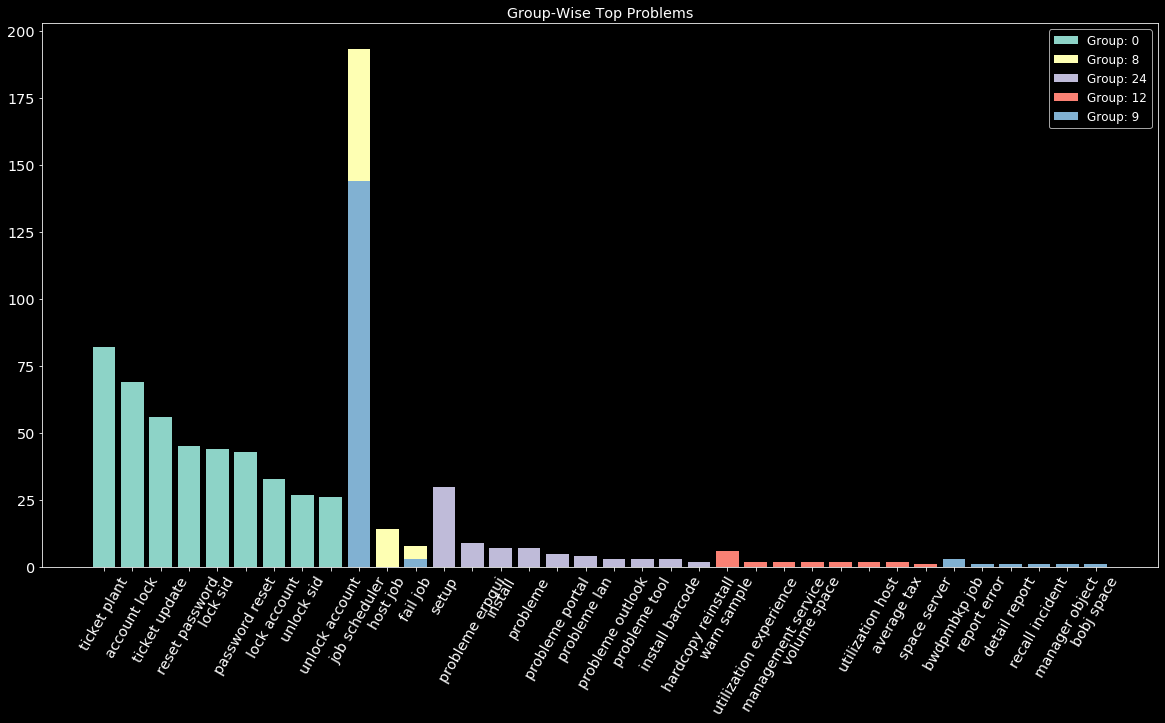

In [117]:
top_10_groups = data.group_id.value_counts().index.tolist()

for i in range(5):
    temp = data_tracker[top_10_groups[i]]['features'][:10]
    plt.bar(temp.problem_type, temp.occurences)
    plt.xticks(rotation=60)
    plt.title(f'Group-Wise Top Problems')
plt.legend(list(map(lambda x: f'Group: {x}', top_10_groups[:5])))
plt.savefig('group_wise_problem_dtribution.png')
plt.show()


In [118]:
def extract_trimmed_text(data):
    text = data.cleaned_merged_text
    trimmed_text = text
    try:
        group_id = data.group_id
        temp = data_tracker[group_id]['features']
        trimmed_text = temp[temp.problem == text].trimmed_text.values[0]
    except Exception as e:
        print(f'Trimmed text extractor crashed | Err Msg={e}')
    return trimmed_text

def extract_top_keywords(data):
    text = data.cleaned_merged_text
    top_keywords = []
    try:
        group_id = data.group_id
        temp = data_tracker[group_id]['features']
        top_keywords = temp[temp.problem == text].top_keywords.values[0]
    except Exception as e:
        print(f'KeyWord extractor crashed | Err Msg={e}')
    return top_keywords
    

In [119]:
data['trimmed_text'] = data.apply(extract_trimmed_text, axis=1)
data['top_key_words'] = data.apply(extract_top_keywords, axis=1)
data['problem_type'] = data.top_key_words.apply(lambda x: ' '.join(x[:2]))

data['num_tokens'] = data.trimmed_text.apply(lambda x: len(x.split()))
data['num_tokens_unique'] = data.trimmed_text.apply(lambda x: len(set(x.split())))

if 'num_unique_tokens' in data.columns:
    data.drop('num_unique_tokens', axis=1, inplace=True)

In [120]:
data.head()

,cleaned_merged_text,group_id,num_tokens,num_characters,trimmed_text,top_key_words,problem_type,num_tokens_unique
0,login issue password issue check employee ma...,0,15,116,login issue password issue check employee mana...,"[login, issue, check, password, manager]",login issue,12
1,outlook meet skype outlook calendar appear a...,0,8,74,outlook meet skype outlook calendar appear adv...,"[outlook, skype]",outlook skype,7
2,cant log vpn log vpn,0,5,35,cant log vpn log vpn,"[log, vpn]",log vpn,3
3,unable access tool page unable access tool page,0,8,47,unable access tool page unable access tool page,"[unable, access, tool, page]",unable access,4
4,error skype error skype,0,4,23,error skype error skype,"[error, skype]",error skype,2


In [121]:
data.to_pickle('group_wise.pkl')

In [122]:
tokens_before = len(data.cleaned_merged_text.str.cat(sep='').split())
tokens_after = len(data.trimmed_text.str.cat(sep='').split())

unique_tokens_before = len(set(data.cleaned_merged_text.str.cat(sep='').split()))
unique_tokens_after = len(set(data.trimmed_text.str.cat(sep=' ').split()))

print(f'Tokens Before: {tokens_before} | Tokens After: {tokens_after}')
print(f'Unique Tokens Before: {unique_tokens_before} | Unique Tokens After: {unique_tokens_after}')

Tokens Before: 107584 | Tokens After: 87148
Unique Tokens Before: 13760 | Unique Tokens After: 7805


In [123]:
group_wise_count = data.group_id.value_counts().to_frame()
group_wise_count.reset_index(inplace=True)
group_wise_count.columns = ['group_id', 'occurences']
group_wise_count

,group_id,occurences
0,0,3974
1,8,661
2,24,289
3,12,257
4,9,252
5,2,241
6,19,215
7,3,200
8,6,184
9,13,145


In [125]:
from sklearn.feature_extraction.text import CountVectorizer
import re

cv = CountVectorizer(max_df=1, stop_words="english", max_features=10000)
word_count_vector = cv.fit_transform(data.trimmed_text)

In [126]:
cv.vocabulary_

{'sgxqsuojr': 3648,
 'xwbesorf': 4627,
 'undock': 4168,
 'gentles': 1509,
 'qpogfwkb': 3195,
 'wihuyjdo': 4518,
 'anwmfvlgenkataramdntyana': 186,
 'reward': 3387,
 'dlv': 978,
 'sobkz': 3730,
 'umsok': 4157,
 'kzbws': 2217,
 'kzvbr': 2219,
 'ekpo': 1128,
 'ave': 300,
 'yno': 4654,
 'rgtry': 3397,
 'pdfbapiobrbapi': 2944,
 'rfcbapipdfplmoriginalsplmobromf': 3389,
 'originalsomf': 2874,
 'jcojco': 1977,
 'accepting': 26,
 'callback': 559,
 'stub': 3848,
 'bloqueadoexurcwkmforma': 478,
 'acceso': 28,
 'mediantedispositivo': 2488,
 'belo': 382,
 'wmsg': 4542,
 'configairiteratorconfigair': 709,
 'xvgftyr': 4625,
 'tryfuh': 4115,
 'vdhfy': 4255,
 'angry': 155,
 'millisecond': 2561,
 'bexpolandiu': 437,
 'siedzibärobhyertyjrejonowymbex': 3682,
 'windy': 4525,
 'grauw': 1589,
 'guide': 1619,
 'dfgry': 920,
 'zscxqdhoalaramdntyan': 4736,
 'attendee': 256,
 'titcket': 4040,
 'yrjhd': 4663,
 'xbdht': 4595,
 'advisor': 64,
 'clicked': 659,
 'fatal': 1311,
 'pnp': 3021,
 'thrdy': 4007,
 'tgyu': 39

In [127]:
pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())

,aao,abandon,abca,abd,abertura,abfragetimeout,abgebrochen,abgelaufen,abhanden,abhandengekommen,abhilfegesellschafterinsitz,abholung,abode,abreu,abrurto,absence,absent,absolut,absolutely,abstech,abstã,abzulesen,accdb,accede,accees,accepted,accepting,accesible,acceso,accespoint,accesschtrtgoyhtschhdgtmips,accessibility,accessreaccesissiedwfiykeobobj,accident,accidental,accidently,accont,accross,acctrabhtuiprishry,accuracy,ace,acessar,acessos,achghar,achghyardr,actively,acts,actuall,adapoter,addiitionalbecoxvqkahadikar,...,zifujpvr,zihrtyud,zitec,ziv,zke,zkea,zkevitua,zkln,zklnâ,zla,zlgmctws,zmcp,zmmdata,zmmtaxupd,znet,znr,zntc,zocjdutp,zor,zpd,zpdadressateneingegangen,zpononpo,zpress,zpumhlic,zredeploy,zrobiä,zscxqdhoalaramdntyan,zsdslsum,zsluxctw,zspvxrfk,zssid,ztax,zuehlke,zugang,zugordnet,zugriffe,zuhause,zuhoylts,zukommen,zulassen,zumindest,zuothryrt,zurtxjbd,zurzeit,zuschaltung,zuvor,zwei,zwip,zwwirep,zzcmpgn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [129]:
for group_id in data_tracker:
    print(f'{group_id} / {max(list(data_tracker.keys()))}', end='\r')
    text = data_tracker[group_id]['features'].trimmed_text
    vectorizer = TfidfVectorizer(smooth_idf=True, use_idf=True)
    temp = pd.DataFrame(vectorizer.fit_transform(text).toarray(), columns=vectorizer.get_feature_names())
    tfidf = temp.sum().to_frame()
    tfidf.reset_index(inplace=True)
    tfidf.columns = ['token', 'tfidf_sum']
    features = list(vectorizer.get_feature_names())
    keyword_threshold = tfidf.tfidf_sum.mean() + tfidf.tfidf_sum.std()
    outlier_threshold = tfidf.tfidf_sum.min() + 0.01*tfidf.tfidf_sum.std()
    keywords = tfidf[tfidf.tfidf_sum > keyword_threshold].token.tolist()
    outliers = tfidf[tfidf.tfidf_sum < outlier_threshold].token.tolist()
    outliers = list(set(outliers).difference(reserved_keywords))
    
    remaining_tokens = set(text.str.cat(sep=' ').split()).difference(keywords).difference(outliers)
    bad_tokens = remaining_tokens.difference(remaining_tokens.intersection(vocab))
    
    
    data_tracker[group_id]['top_keywords'] = keywords
    data_tracker[group_id]['outliers'] = outliers
    data_tracker[group_id]['unique_tokens'] = features
    data_tracker[group_id]['total_tokens'] = len(features)
    data_tracker[group_id]['bad_tokens'] = bad_tokens
    
    


In [130]:
def trim_outliers(data):
    text, outliers = data.trimmed_text, data.outliers
    if bool(outliers):
        for token in outliers:
            text = re.sub(r'\b{}\b'.format(token), '', text)
    text = remove_extra_spaces(text)
    return text

In [131]:
for group_id in data_tracker:
    print(f'{group_id} / {max(list(data_tracker.keys()))}', end='\r')
    outliers = data_tracker[group_id]['outliers']
    tokens_to_remove = list(set(outliers).difference(reserved_keywords))
    temp = data_tracker[group_id]['features']
    temp['outliers'] = temp.trimmed_text.apply(lambda x: list(set(x.split()).intersection(tokens_to_remove)))
#     temp['trimmed_text'] = temp.apply(trim_outliers, axis=1)

In [132]:
data_tracker[0]['features'].trimmed_text.values[0]

'ticket plant update ticket plant update'

In [133]:
sorted(data_tracker[11]['outliers'])

['cause',
 'collemc',
 'dwgs',
 'floor',
 'furlaf',
 'geronca',
 'moment',
 'navarcm',
 'pintog',
 'programdntys',
 'review',
 'rout',
 'shop',
 'sometimes',
 'stop',
 'visualize']

In [134]:
x = data_tracker[21]['features']
x[x.trimmed_text.str.contains('indicator')].trimmed_text.values[0]

'miss dialog box basket shop button replace display box basket replacement status click indicator replace miss dialog shop grid msg button page'

In [135]:
from textblob import TextBlob

In [136]:
'known' in vocab


True

In [137]:
 for group_id in data_tracker:
     outliers = data_tracker[group_id]['outliers']
     corrected_tokens = {}
     total_outliers = len(outliers)
     for i in range(total_outliers):
         print(f'{group_id} / {max(list(data_tracker.keys()))} - {i+1} / {total_outliers}', end='\r')
         token = outliers[i]
         possible_tokens = []
         if token not in vocab and token not in stopwords:
             if len(token) > 7:
                 possible_token = str(TextBlob(token).correct())
                 if possible_token != token:
                     if possible_token in vocab:
                         possible_tokens.append(token)
                 else:
                     possible_tokens = extract_possible_words(token, n=4)
         corrected_tokens[token] = ' '.join(possible_tokens) 
     data_tracker[group_id]['corrected_tokens'] = corrected_tokens
 #     break

In [138]:
def trim_outliers(data):
    outliers = data.outliers
    text = data.trimmed_text
    for token in outliers:
        text = re.sub(r'\b{}\b'.format(token), '', text)
    text = remove_extra_spaces(text)
    return text

In [139]:
# cleaning outliers
for group_id in data_tracker:
    print(f'{group_id} | {max(list(data_tracker.keys()))}', end='\r')
    outliers = data_tracker[group_id]['outliers']
    top_keywords = data_tracker[group_id]['top_keywords']
    corrected_tokens = data_tracker[group_id]['corrected_tokens']
    features = data_tracker[group_id]['features']
    tokens_to_remove = list(filter(lambda x: corrected_tokens[x] == '', list(corrected_tokens.keys())))
    tokens_to_correct = list(filter(lambda x: corrected_tokens[x] != '', list(corrected_tokens.keys())))
    features['outliers'] = features.trimmed_text.apply(lambda x: list(set(x.split()).intersection(tokens_to_remove)))
    features['trimmed_text'] = features.apply(trim_outliers, axis=1)
    features['top_keywords'] = features.trimmed_text.apply(lambda x: list(set(x.split()).intersection(top_keywords)))
    

In [140]:
data['trimmed_text'] = data.apply(extract_trimmed_text, axis=1)
data['top_key_words'] = data.apply(extract_top_keywords, axis=1)
data['num_tokens'] = data.trimmed_text.apply(lambda x: len(x.split()))
data['num_tokens_unique'] = data.trimmed_text.apply(lambda x: len(set(x.split())))
data['num_characters'] = data.trimmed_text.apply(lambda x: len(x))

In [141]:
data.head()

,cleaned_merged_text,group_id,num_tokens,num_characters,trimmed_text,top_key_words,problem_type,num_tokens_unique
0,login issue password issue check employee ma...,0,15,101,login issue password issue check employee mana...,"[caller, detail, password, reset, manager, log...",login issue,12
1,outlook meet skype outlook calendar appear a...,0,8,57,outlook meet skype outlook calendar appear adv...,"[meet, skype, advise, outlook]",outlook skype,7
2,cant log vpn log vpn,0,5,20,cant log vpn log vpn,"[vpn, log]",log vpn,3
3,unable access tool page unable access tool page,0,8,47,unable access tool page unable access tool page,"[unable, access, tool, page]",unable access,4
4,error skype error skype,0,4,23,error skype error skype,"[skype, error]",error skype,2


In [142]:
group_count = data.group_id.value_counts().to_frame()
group_count.reset_index(inplace=True)
group_count.columns = ['group_id', 'occurences']
group_count

,group_id,occurences
0,0,3974
1,8,661
2,24,289
3,12,257
4,9,252
5,2,241
6,19,215
7,3,200
8,6,184
9,13,145


In [143]:
top_groups = group_count[(group_count.occurences > 30)].group_id.values.tolist()
target_data = data[data.group_id.isin(top_10_groups)]

In [144]:
t = data[data.group_id == 0]
vectorizer = TfidfVectorizer(smooth_idf=True, use_idf=True)
vectorizer.fit(t.trimmed_text.values)
x = pd.DataFrame(vectorizer.transform(t.trimmed_text.values).toarray(), columns=vectorizer.get_feature_names())

pca = PCA()
pca.fit(x.apply(zscore).T)
print(x.shape, pca.components_.shape)

(3974, 3320) (3320, 3974)


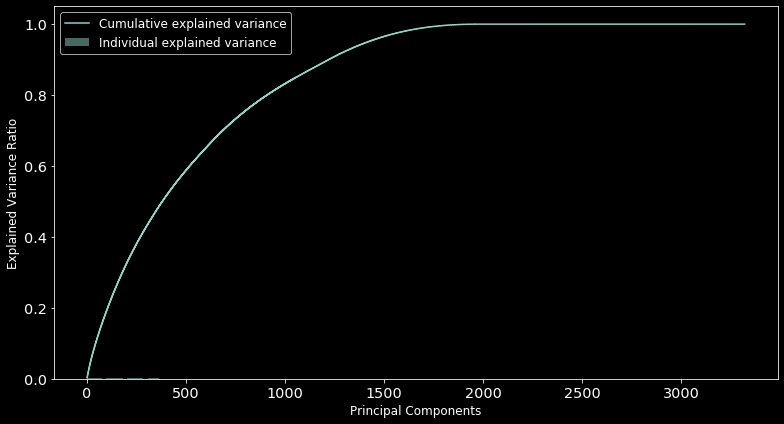

In [145]:
plt.figure(figsize=(11 , 6))
plt.bar(range(1, pca.explained_variance_ratio_.shape[0] + 1), pca.explained_variance_ratio_, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, pca.explained_variance_ratio_.shape[0] + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [146]:
# for group_id in sorted(top_groups):
# #     print(f'{group_id} / {max(top_groups)}', end='\r')
#     temp = data[data.group_id == group_id]
#     vectorizer = TfidfVectorizer(smooth_idf=True, use_idf=True)
#     df = pd.DataFrame(vectorizer.fit_transform(temp.trimmed_text.values).toarray(), 
#                                             columns=vectorizer.get_feature_names())

#     pca = PCA()
#     pca.fit(df.apply(zscore).T)
#     x = pd.DataFrame(pca.components_).T
#     svd = TruncatedSVD(n_components=300, random_state=7)
#     svd_features = pd.DataFrame(svd.fit_transform(x))
#     svd_features['group_id'] = [group_id]*svd_features.shape[0]
#     print(group_id, svd_features.shape, x.shape)
# #     break

In [147]:
t = data[data.group_id.isin(top_groups)]
vectorizer = TfidfVectorizer(smooth_idf=True, use_idf=True)
vectorizer.fit(t.trimmed_text.values)
x = pd.DataFrame(vectorizer.transform(t.trimmed_text.values).toarray(), columns=vectorizer.get_feature_names())

pca = PCA()
pca.fit(x.apply(zscore).T)
print(x.shape, pca.components_.shape)

(8110, 7376) (7376, 8110)


In [148]:
x = pd.DataFrame(pca.components_).T

In [149]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,7326,7327,7328,7329,7330,7331,7332,7333,7334,7335,7336,7337,7338,7339,7340,7341,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351,7352,7353,7354,7355,7356,7357,7358,7359,7360,7361,7362,7363,7364,7365,7366,7367,7368,7369,7370,7371,7372,7373,7374,7375
0,0.000117,0.000160,-0.002183,-0.000390,-0.000092,-0.000097,-0.000081,-1.439196e-04,-0.000075,-0.000276,0.000095,-0.000286,0.000293,0.000192,-0.000159,-0.000141,0.000248,-0.000024,0.000112,-0.000540,-0.000215,-0.000083,-0.000190,-0.000163,0.000580,0.000066,-0.000042,0.000244,0.000054,-0.001287,-0.000260,0.000280,-0.000100,0.000035,-0.000093,-0.001215,-0.000555,-0.000185,-0.000193,-0.000514,-0.000017,-0.000584,-0.000214,-0.000608,0.000379,-0.000193,-0.000611,0.000413,-0.000008,0.000023,...,0.013696,-0.001103,-0.000368,-0.004261,0.000621,0.005113,-0.000550,-0.003969,-0.004054,0.000413,-0.002494,0.005598,-0.003265,-0.001716,-0.001547,-0.002852,-0.003868,0.001878,-0.003488,-0.002805,-0.002079,0.003648,0.000214,-0.005379,0.004225,0.000934,0.003566,-0.002430,0.001538,0.003295,-0.001336,-0.003841,0.005129,0.000352,-0.003536,-0.001399,0.002383,-0.004823,-0.005862,-0.003729,-0.004438,0.001878,0.004490,-0.001691,0.001260,-0.000537,0.003733,-0.000022,-0.001232,-0.006220
1,0.000196,-0.000027,-0.001849,-0.000635,-0.000099,-0.000092,-0.000079,-1.124334e-04,-0.000233,-0.000235,-0.000031,-0.000205,-0.000311,-0.000301,-0.000113,-0.000094,-0.000180,-0.000149,-0.000121,-0.000458,-0.000201,-0.000107,0.000038,-0.000250,-0.000162,0.000052,-0.000177,0.000368,0.000056,-0.001062,-0.000446,-0.000062,-0.000364,-0.000115,-0.000163,-0.001237,-0.000495,-0.000384,-0.000132,-0.000030,0.000143,-0.000419,-0.000036,-0.000245,-0.000003,-0.000082,-0.000113,-0.000102,0.000037,-0.000745,...,-0.003235,-0.002181,0.004418,-0.002002,-0.001027,-0.001991,0.006303,-0.000274,0.008763,0.005104,0.005402,-0.002757,0.002696,0.005138,-0.002328,0.002997,-0.002000,0.002685,-0.005218,-0.004475,0.001486,0.005489,-0.004876,-0.002415,0.002908,-0.004129,-0.000189,-0.001239,-0.002752,0.003501,0.004193,-0.001843,-0.001092,0.000725,-0.004740,0.001132,-0.001097,0.002360,0.000781,-0.003650,-0.000526,0.000074,0.001105,0.001641,-0.001655,-0.005177,-0.001248,0.001720,-0.003635,-0.001949
2,0.000023,0.000037,-0.001393,-0.000338,0.000023,0.000003,0.000042,-2.942976e-07,-0.000045,-0.000006,0.000005,0.000017,-0.000012,-0.000179,0.000089,-0.000136,0.000029,-0.000019,-0.000022,-0.000001,0.000034,0.000078,-0.000002,-0.000160,-0.000315,-0.000029,-0.000006,-0.000113,0.000035,-0.000117,0.000066,0.000013,0.000012,-0.000150,-0.000008,0.000007,0.000013,0.000032,-0.000060,-0.000111,0.000062,0.000010,0.000036,0.000009,-0.000002,0.000244,-0.000005,-0.000100,0.000156,0.000011,...,0.001053,0.002816,0.001474,0.002344,0.001878,0.000274,0.001512,0.001516,0.002074,0.005074,-0.002392,0.000558,0.001848,-0.000043,-0.002754,0.001802,0.001529,-0.000301,0.001995,-0.000810,0.001950,-0.000630,-0.004351,0.001504,0.000896,-0.000287,-0.000747,0.000459,-0.001457,0.001619,-0.001599,-0.000262,0.001729,0.000521,0.000910,0.000400,-0.001339,-0.001186,-0.000895,-0.000429,0.000484,-0.000269,0.000787,0.001817,0.000693,-0.000145,0.000199,-0.001181,-0.001071,0.000389
3,0.000017,0.000033,-0.001758,-0.000456,-0.000007,0.000045,0.000013,1.438923e-04,-0.000030,-0.000061,-0.000020,-0.000031,-0.000191,0.000220,0.000059,-0.000074,-0.000062,-0.000093,-0.000035,-0.000162,-0.000029,0.000210,-0.000007,-0.000200,-0.000129,-0.000062,-0.000096,0.000074,0.000030,-0.000415,0.000120,-0.000050,-0.000033,0.000091,0.000060,-0.000360,-0.000139,-0.000087,0.000094,-0.000133,0.000116,-0.000210,0.000178,-0.000323,-0.000094,-0.000291,-0.000640,0.000840,-0.000325,0.000940,...,0.000649,-0.002160,0.000299,0.004102,-0.002798,0.004136,0.004571,0.006017,-0.000477,0.003801,0.001006,-0.001489,0.005631,0.002621,0.003171,0.004683,0.002924,0.000475,0.003267,0.000233,0.000295,0.002358,-

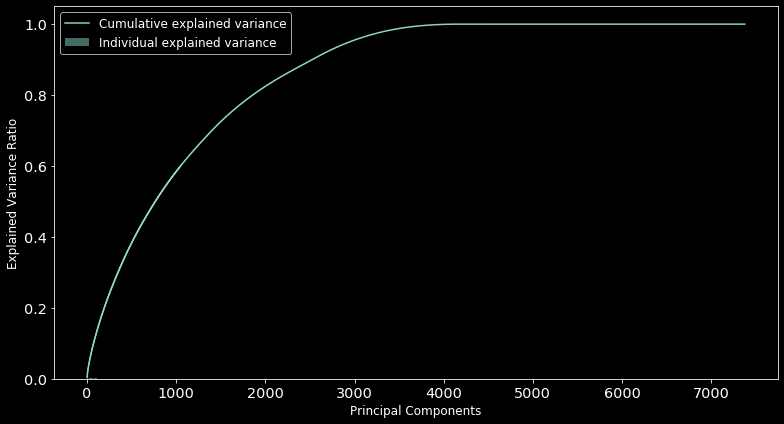

In [150]:
plt.figure(figsize=(11 , 6))
plt.bar(range(1, pca.explained_variance_ratio_.shape[0] + 1), pca.explained_variance_ratio_, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, pca.explained_variance_ratio_.shape[0] + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [151]:
t = data[data.group_id.isin(top_groups)]
vectorizer = TfidfVectorizer(smooth_idf=True, use_idf=True)
vectorizer.fit(t.trimmed_text.values)
x = pd.DataFrame(vectorizer.transform(t.trimmed_text.values).toarray(), columns=vectorizer.get_feature_names())

pca = PCA(n_components=3000)
pca.fit(x.apply(zscore).T)
x = pd.DataFrame(pca.components_).T
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,2950,2951,2952,2953,2954,2955,2956,2957,2958,2959,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0.000117,0.000160,-0.002183,-0.000390,-0.000092,-0.000097,-0.000081,-1.439153e-04,-0.000075,-0.000276,0.000095,-0.000286,0.000293,0.000192,-0.000159,-0.000141,0.000248,-0.000024,0.000112,-0.000540,-0.000215,-0.000083,-0.000190,-0.000163,0.000580,0.000066,-0.000042,0.000244,0.000054,-0.001287,-0.000260,0.000280,-0.000100,0.000035,-0.000093,-0.001215,-0.000555,-0.000185,-0.000193,-0.000514,-0.000017,-0.000584,-0.000214,-0.000608,0.000379,-0.000193,-0.000611,0.000413,-0.000008,0.000023,...,0.001740,-0.003632,-0.000554,-0.003646,-0.000831,-0.000271,0.004845,-0.002215,0.001560,-0.001055,-0.002779,0.003157,0.003229,-0.003452,0.003877,-0.001773,0.002054,0.006394,0.000068,0.001913,0.001858,0.000215,-0.002308,0.001704,0.001990,0.001353,-0.000138,-0.003214,-0.000005,0.003478,0.000966,0.000358,0.003761,-0.001828,-0.002344,0.001340,0.001248,0.000804,-0.001983,0.002924,0.001673,0.001152,-0.000215,0.000245,0.002397,0.003377,0.001237,-0.004949,-0.000135,-0.000860
1,0.000196,-0.000027,-0.001849,-0.000635,-0.000099,-0.000092,-0.000079,-1.124277e-04,-0.000233,-0.000235,-0.000031,-0.000205,-0.000311,-0.000301,-0.000113,-0.000094,-0.000180,-0.000149,-0.000121,-0.000458,-0.000201,-0.000107,0.000037,-0.000250,-0.000162,0.000052,-0.000177,0.000368,0.000056,-0.001062,-0.000446,-0.000062,-0.000364,-0.000115,-0.000163,-0.001237,-0.000496,-0.000384,-0.000132,-0.000030,0.000143,-0.000420,-0.000036,-0.000246,-0.000003,-0.000082,-0.000113,-0.000102,0.000037,-0.000745,...,0.007160,0.011270,-0.011155,-0.005544,-0.008278,0.005508,0.000625,0.014407,0.007541,0.007065,0.005315,0.011954,0.017094,0.016395,0.011372,-0.015668,-0.008270,0.007749,-0.003038,0.020439,0.003009,0.000451,0.009482,-0.009955,0.009314,-0.001215,-0.003373,0.008065,-0.017033,0.000524,0.000869,0.002317,0.015261,-0.000708,0.006026,-0.002929,0.001067,0.006151,0.010425,0.013107,0.003040,-0.003490,-0.007873,-0.008386,-0.000825,0.002847,0.010419,-0.016436,-0.002066,-0.009745
2,0.000023,0.000037,-0.001393,-0.000338,0.000023,0.000003,0.000042,-2.961538e-07,-0.000045,-0.000006,0.000005,0.000017,-0.000012,-0.000179,0.000089,-0.000136,0.000029,-0.000019,-0.000022,-0.000001,0.000034,0.000078,-0.000002,-0.000161,-0.000315,-0.000029,-0.000006,-0.000113,0.000035,-0.000117,0.000066,0.000013,0.000012,-0.000150,-0.000008,0.000007,0.000013,0.000032,-0.000060,-0.000111,0.000062,0.000010,0.000036,0.000009,-0.000002,0.000244,-0.000005,-0.000100,0.000156,0.000011,...,0.009978,0.004758,0.005715,-0.009280,0.011263,-0.000076,0.004412,0.002887,-0.000328,0.000491,-0.013316,-0.010931,0.002380,0.004475,0.008884,0.013937,-0.013600,-0.002568,0.006028,0.012825,-0.009095,0.004630,-0.005859,-0.009721,0.000678,-0.003482,-0.004857,-0.010393,0.004478,0.006729,0.014406,-0.012174,0.001929,0.006334,-0.006405,0.011625,-0.016780,-0.009320,0.010800,0.002274,0.001211,0.002216,-0.014439,-0.009738,0.001462,-0.002282,0.006955,-0.024425,0.009610,-0.004188
3,0.000017,0.000033,-0.001758,-0.000456,-0.000007,0.000045,0.000013,1.438817e-04,-0.000030,-0.000061,-0.000020,-0.000031,-0.000191,0.000220,0.000059,-0.000074,-0.000062,-0.000093,-0.000035,-0.000162,-0.000029,0.000210,-0.000007,-0.000200,-0.000129,-0.000062,-0.000096,0.000074,0.000030,-0.000415,0.000120,-0.000050,-0.000033,0.000091,0.000060,-0.000360,-0.000139,-0.000087,0.000094,-0.000133,0.000116,-0.000210,0.000178,-0.000323,-0.000094,-0.000291,-0.000640,0.000840,-0.000325,0.000940,...,-0.011517,0.013871,0.003207,0.008935,-0.013341,-0.007345,0.009123,0.006623,-0.002580,-0.001111,0.000159,0.004229,-0.000405,0.004979,0.001054,0.003379,0.012375,0.000466,0.011327,-0.016536,-0.009382,0.007978,0.011443,-0.0

In [152]:
svd = TruncatedSVD(n_components=300)

In [153]:
x = pd.DataFrame(svd.fit_transform(x))
x['group_id'] = t.group_id.astype('int').values

In [184]:
x.to_pickle('svd.pkl')

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [156]:
train, test = train_test_split(x, test_size=0.3, random_state=1)

In [157]:
d = DecisionTreeClassifier()

In [158]:
train_X = train.drop('group_id', axis=1)
train_y = train.group_id.values

test_X = test.drop('group_id', axis=1)
test_y = test.group_id.values

In [159]:
d.fit(train_X, train_y)

DecisionTreeClassifier()

In [160]:
p = d.predict(train_X)

In [161]:
accuracy_score(p, train_y)

0.9355293288708825

In [162]:
p2 = d.predict(test_X)

In [163]:
accuracy_score(p2, test_y)

0.42704480065762435

In [164]:
print(classification_report(p2, test_y))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1173
           1       0.25      0.13      0.17        15
           2       0.05      0.07      0.06        59
           3       0.05      0.05      0.05        65
           4       0.21      0.19      0.20        36
           5       0.41      0.28      0.33        50
           6       0.18      0.28      0.22        40
           7       0.04      0.07      0.05        15
           8       0.49      0.35      0.41       270
           9       0.11      0.21      0.15        38
          10       0.33      0.37      0.35        30
          12       0.18      0.16      0.17        82
          13       0.05      0.06      0.05        31
          14       0.00      0.00      0.00        43
          15       0.08      0.07      0.08        14
          16       0.04      0.05      0.04        21
          17       0.76      0.54      0.63        24
          18       0.04    

In [165]:
svc = SVC()

In [166]:
svc.fit(train_X, train_y)

SVC()

In [167]:
p = svc.predict(train_X)

In [168]:
accuracy_score(p, train_y)

0.749691738594328

In [169]:
p2 = svc.predict(test_X)

In [171]:
accuracy_score(p2, test_y)

0.5626798191533087

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
r = RandomForestClassifier(n_estimators=30, max_depth=5, max_features=200, min_impurity_split=10, random_state=7)

In [174]:
r.fit(train_X, train_y)

RandomForestClassifier(max_depth=5, max_features=200, min_impurity_split=10,
                       n_estimators=30, random_state=7)

In [175]:
p = r.predict(train_X)

In [176]:
accuracy_score(p, train_y)

0.49039985908050027

In [177]:
p2 = r.predict(test_X)

In [178]:
accuracy_score(p2, test_y)

0.48910809699958896

In [179]:
from sklearn.ensemble import GradientBoostingClassifier

In [180]:
g = GradientBoostingClassifier()

In [181]:
g.fit(train_X, train_y)

GradientBoostingClassifier()

In [182]:
p = g.predict(test_X)

In [183]:
accuracy_score(p, test_y)

0.5104808877928483